In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [2]:
%matplotlib inline

from session.sessions import selected_009266, selected_008229, selected_009265, selected_60
from imports import *
from scipy import stats
from loading import load_session_data
from target import get_spike_counts, build_event_mx
np.set_printoptions(suppress=True)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
sessions = [s for s in selected_009266.keys()]
sessions.sort()
sessions

['009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

In [6]:
session = sessions[0]

session_data = load_session_data(session, load_aeps=True, load_moseq=True)

tl = session_data['tl']
trials = session_data['trials']
cfg = session_data['cfg']
areas = session_data['areas']
aeps = session_data['aeps']
aeps_events = session_data['aeps_events']
AEP_metrics_lims = session_data['AEP_metrics_lims']
AEP_metrics_raw = session_data['AEP_metrics_raw']
AEP_metrics_norm = session_data['AEP_metrics_norm']
tgt_matrix = session_data['tgt_matrix']
single_units = session_data['single_units']
spike_times = session_data['spike_times']
unit_names = session_data['unit_names']
animal = session_data['animal']
aeps_file = session_data['aeps_file']
h5_file = session_data['h5_file']
report_path = session_data['report_path']
session

'009266_hippoSIT_2023-04-17_17-04-17'

### Target / background

In [8]:
dst_path = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
h5_file  = os.path.join(dst_path, animal, session, 'meta.h5')
with h5py.File(h5_file, 'r') as f:
    event_mx = np.array(f['processed']['sound_events'])  # time, X, Y, speed, etc.
#event_mx = build_event_mx(tl, aeps_events[0][0], 0.25)

#pulses_bgr_aeps     = aeps_events[aeps_events[:, 1] == 1][:, 0]
#pulses_tgt_aeps     = aeps_events[aeps_events[:, 1] == 2][:, 0]

# take only when real stimulation was ON
#pulses_bgr = pulses_bgr[(pulses_bgr > 600) & (pulses_bgr < 2400)]
#pulses_tgt = pulses_tgt[(pulses_tgt > 600) & (pulses_tgt < 2400)]
#pulses_sil = pulses_sil[(pulses_sil > 600) & (pulses_sil < 2400)]
#pulses_noi = pulses_noi[(pulses_noi > 600) & (pulses_noi < 2400)]

# pulses before and after
#pulse_times = np.array([i*latency for i in range(int((duration - latency)/latency) + 10)]) + offset
#pulse_times = pulse_times[pulse_times < duration]
#pulse_times += np.arange(len(pulse_times)) * drift/len(pulse_times)
#pulses_bgr_b = pulse_times[pulse_times < 600]
#pulses_bgr_a = pulse_times[pulse_times > 2400]

titles = ['Noi', 'Sil', 'Bgr', 'Tgt']
for i, p in enumerate([-1, 0, 1, 2]):
    print("%s: %d" % (titles[i], len(event_mx[event_mx[:, 1] == p])))

Noi: 196
Sil: 4336
Bgr: 4111
Tgt: 956


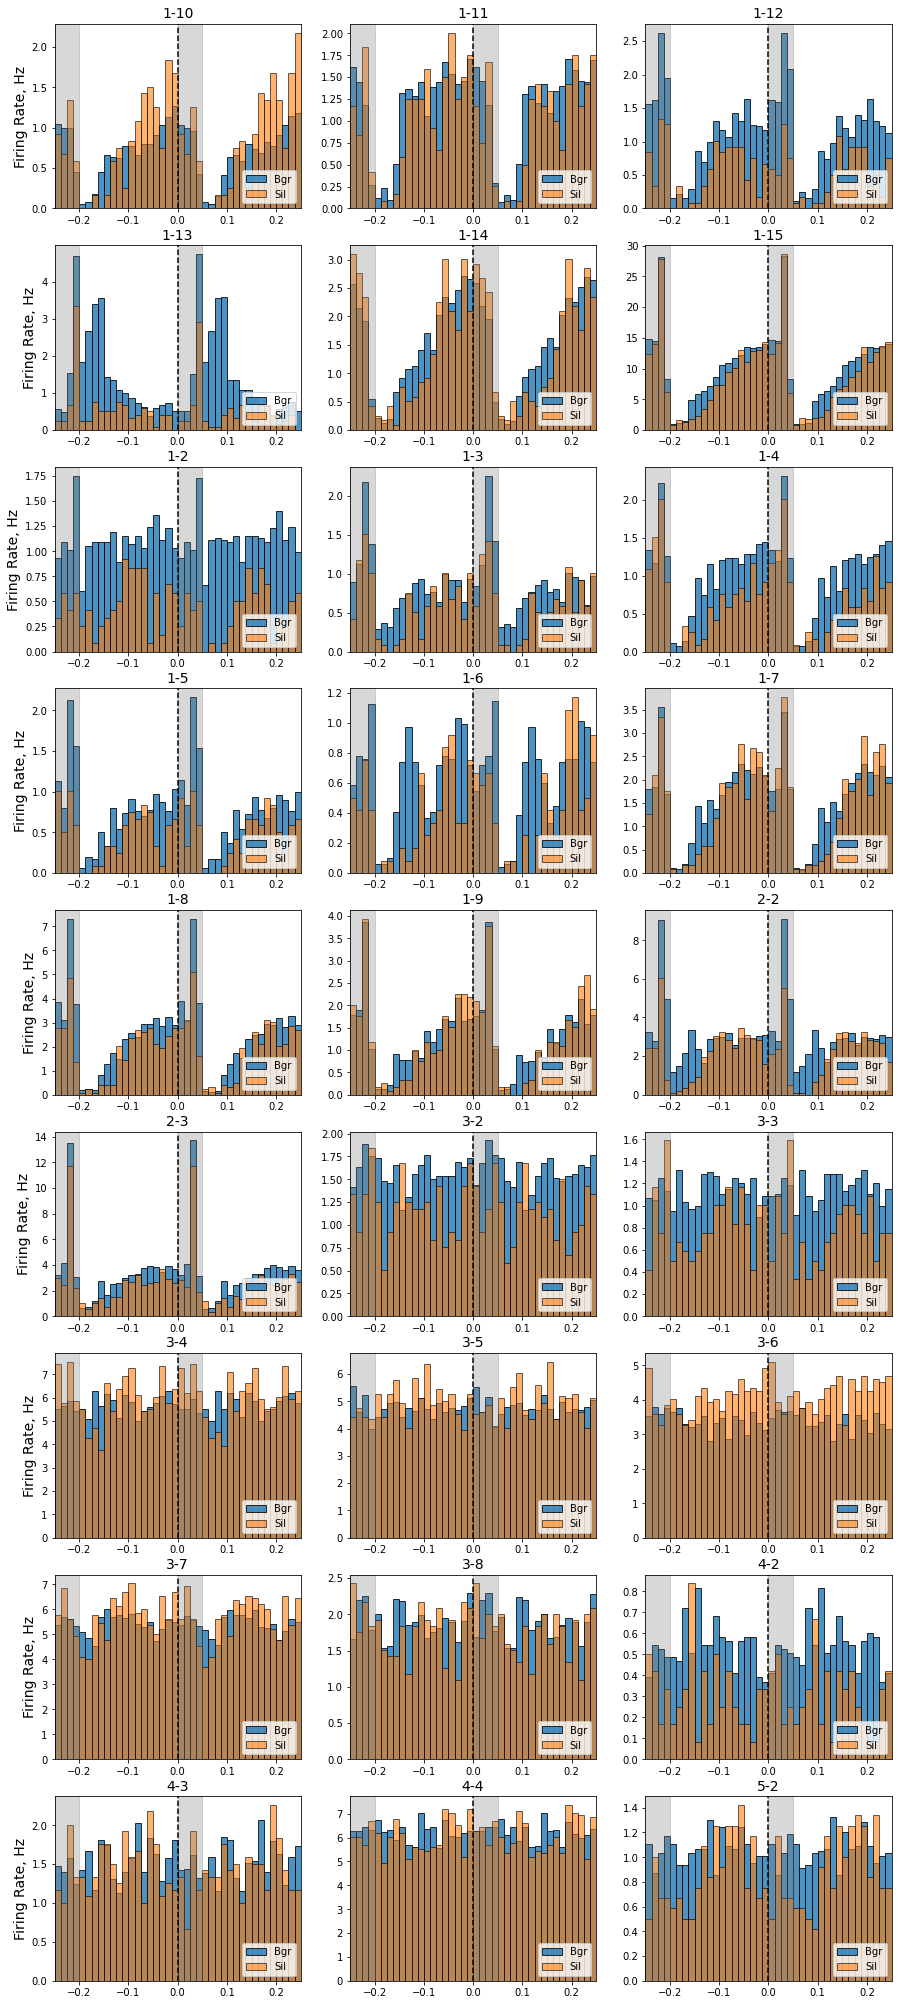

In [10]:
i1, i2 = 2, 1
psth_times_A = event_mx[event_mx[:, 1] == i1][:, 0]  # orange
psth_times_B = event_mx[event_mx[:, 1] == i2][:, 0]  # blue
to_plot = unit_names
#to_plot = ['1-15']

hw, bc = 0.25, 41
cols = 3
rows = int(np.ceil(len(to_plot)/3))
fig = plt.figure(figsize=(15, rows*4))

for i, unit_name in enumerate(to_plot[:]):
    bins, counts_A = get_spike_counts(spike_times[unit_name], psth_times_A, hw, bc)
    bins, counts_B = get_spike_counts(spike_times[unit_name], psth_times_B, hw, bc)
    
    ax = fig.add_subplot(rows, cols, i+1)
    
    ax.hist(bins[:-1], bins=bins, weights=counts_B, edgecolor='black', color='tab:blue', alpha=0.8, label=titles[i1])
    ax.hist(bins[:-1], bins=bins, weights=counts_A, edgecolor='black', color='tab:orange', alpha=0.6, label=titles[i2])
    ax.axvline(0, color='black', ls='--')
    ax.axvspan(0, 0.05, alpha=0.3, color='gray')
    ax.axvspan(0 - hw, 0 - hw + 0.05, alpha=0.3, color='gray')
    ax.set_title(unit_name, fontsize=14)
    ax.legend(loc='lower right', prop={'size': 10})
    ax.set_xlim(-hw, hw)
    if i % 3 == 0:
        ax.set_ylabel("Firing Rate, Hz", fontsize=14)

#fig.savefig(os.path.join(report_path, 'PSTH_%s_%s.pdf' % (labels[0], labels[1])))

### Successful / failed entrances, aligned to entrance / exit

30 50


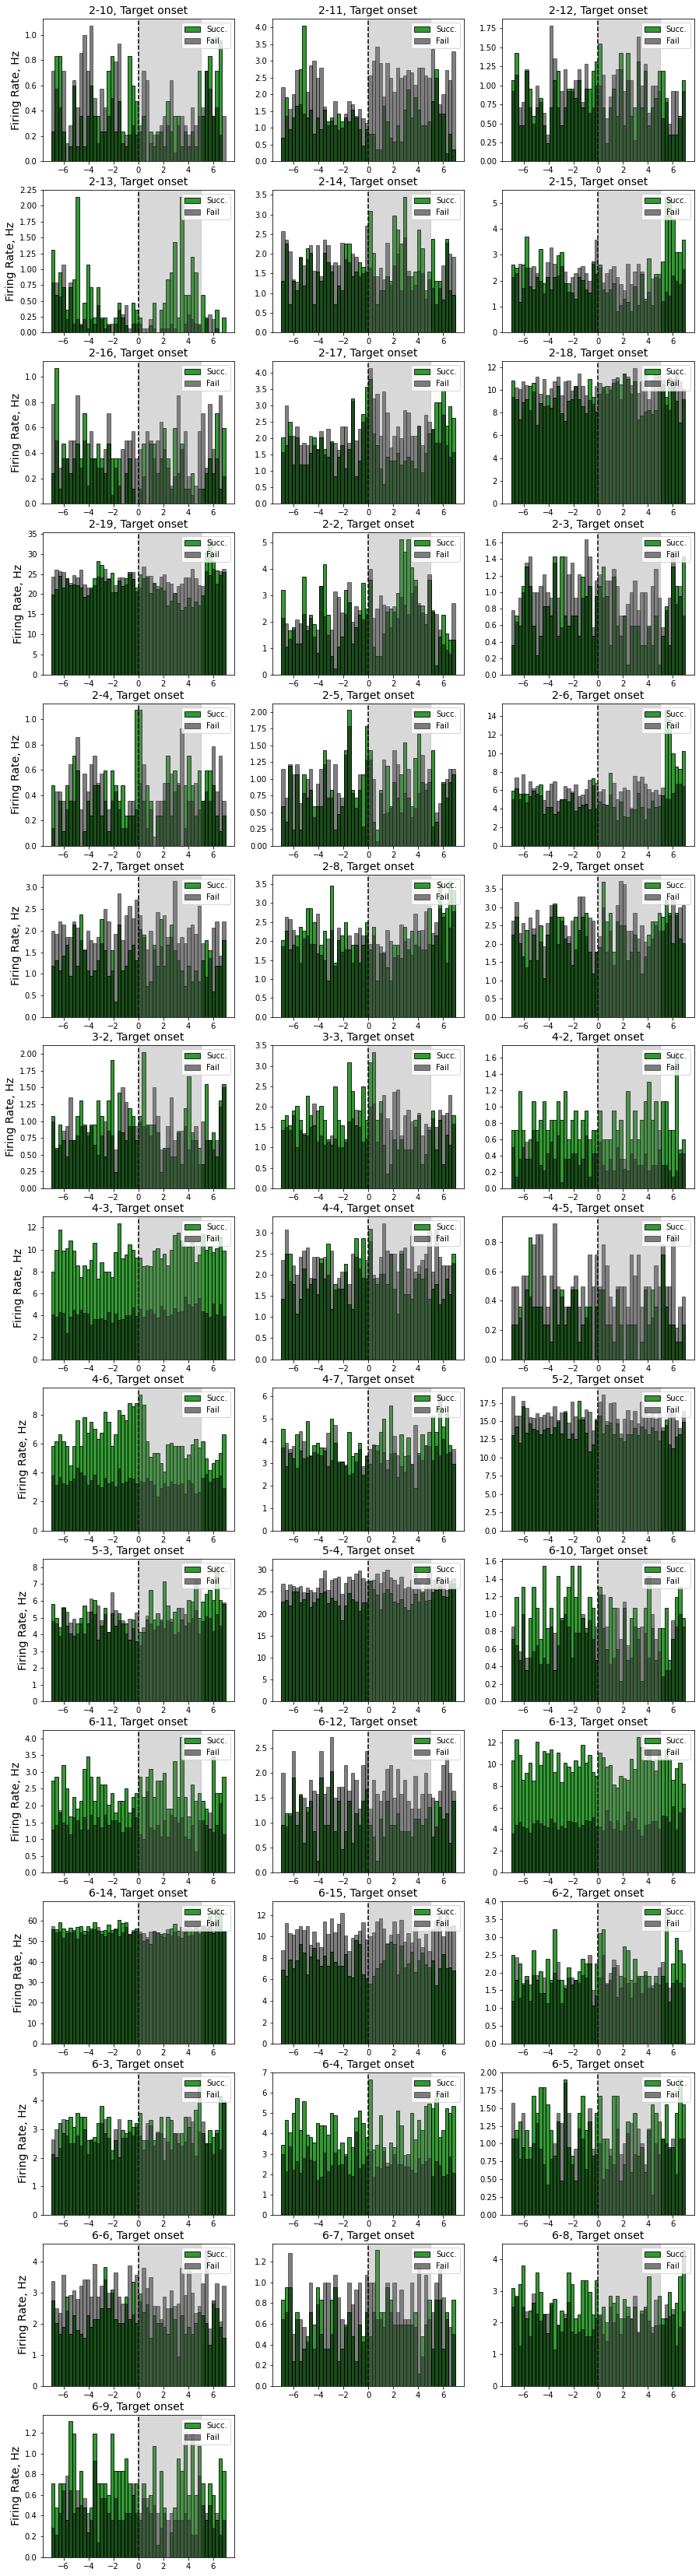

In [8]:
# FIXME: onset should be about ~20ms earlier actually, why?
to_plot = dict(list(single_units.items()))
tgt_dur = cfg['experiment']['target_duration']
is_onset = True  # false for offset

rows = int(np.ceil(len(to_plot)/3))
fig = plt.figure(figsize=(15, rows*4))

idxs_succ = np.where(tgt_matrix[:, 4] == 1)[0]
idxs_miss = np.where(tgt_matrix[:, 4] == 0)[0]
idx_tl = 0 if is_onset else 1
text = 'onset' if is_onset else 'offset'

for i, unit_name in enumerate(to_plot.keys()):
    bins, counts_tgt_success = get_spike_counts(spike_times[unit_name], tl[tgt_matrix[idxs_succ][:, idx_tl]][:, 0], hw=7, bin_count=51)
    bins, counts_tgt_fail    = get_spike_counts(spike_times[unit_name], tl[tgt_matrix[idxs_miss][:, idx_tl]][:, 0], hw=7, bin_count=51)
    
    ax = fig.add_subplot(rows, 3, i+1)
    ax.hist(bins[:-1], bins=bins, weights=counts_tgt_success, edgecolor='black', color='green', alpha=0.8, label='Succ.')
    ax.hist(bins[:-1], bins=bins, weights=counts_tgt_fail, edgecolor='black', color='black', alpha=0.5, label='Fail')
    ax.axvline(0, color='black', ls='--')
    ax.set_title("%s, Target %s" % (unit_name, text), fontsize=14)
    ax.axvspan(0, tgt_dur if is_onset else -tgt_dur, alpha=0.3, color='gray')
    ax.legend(loc='upper right', prop={'size': 10})
    if i % 3 == 0:
        ax.set_ylabel("Firing Rate, Hz", fontsize=14)

print(len(idxs_succ), len(idxs_miss))
fig.savefig(os.path.join(report_path, 'PSTH_succ_fail_tgt_%s.pdf' % text))

### AEP metric high / low

In [28]:
# # load metrics
area = 'A1'

AEP_metrics_lims = {}
AEP_metrics_raw  = {}
AEP_metrics_norm = {}
with h5py.File(aeps_file, 'r') as f:
    grp = f[area]
    
    for metric_name in grp['raw']:
        AEP_metrics_raw[metric_name]  = np.array(grp['raw'][metric_name])
        AEP_metrics_norm[metric_name] = np.array(grp['norm'][metric_name])
        AEP_metrics_lims[metric_name] = [int(x) for x in grp['raw'][metric_name].attrs['limits'].split(',')]

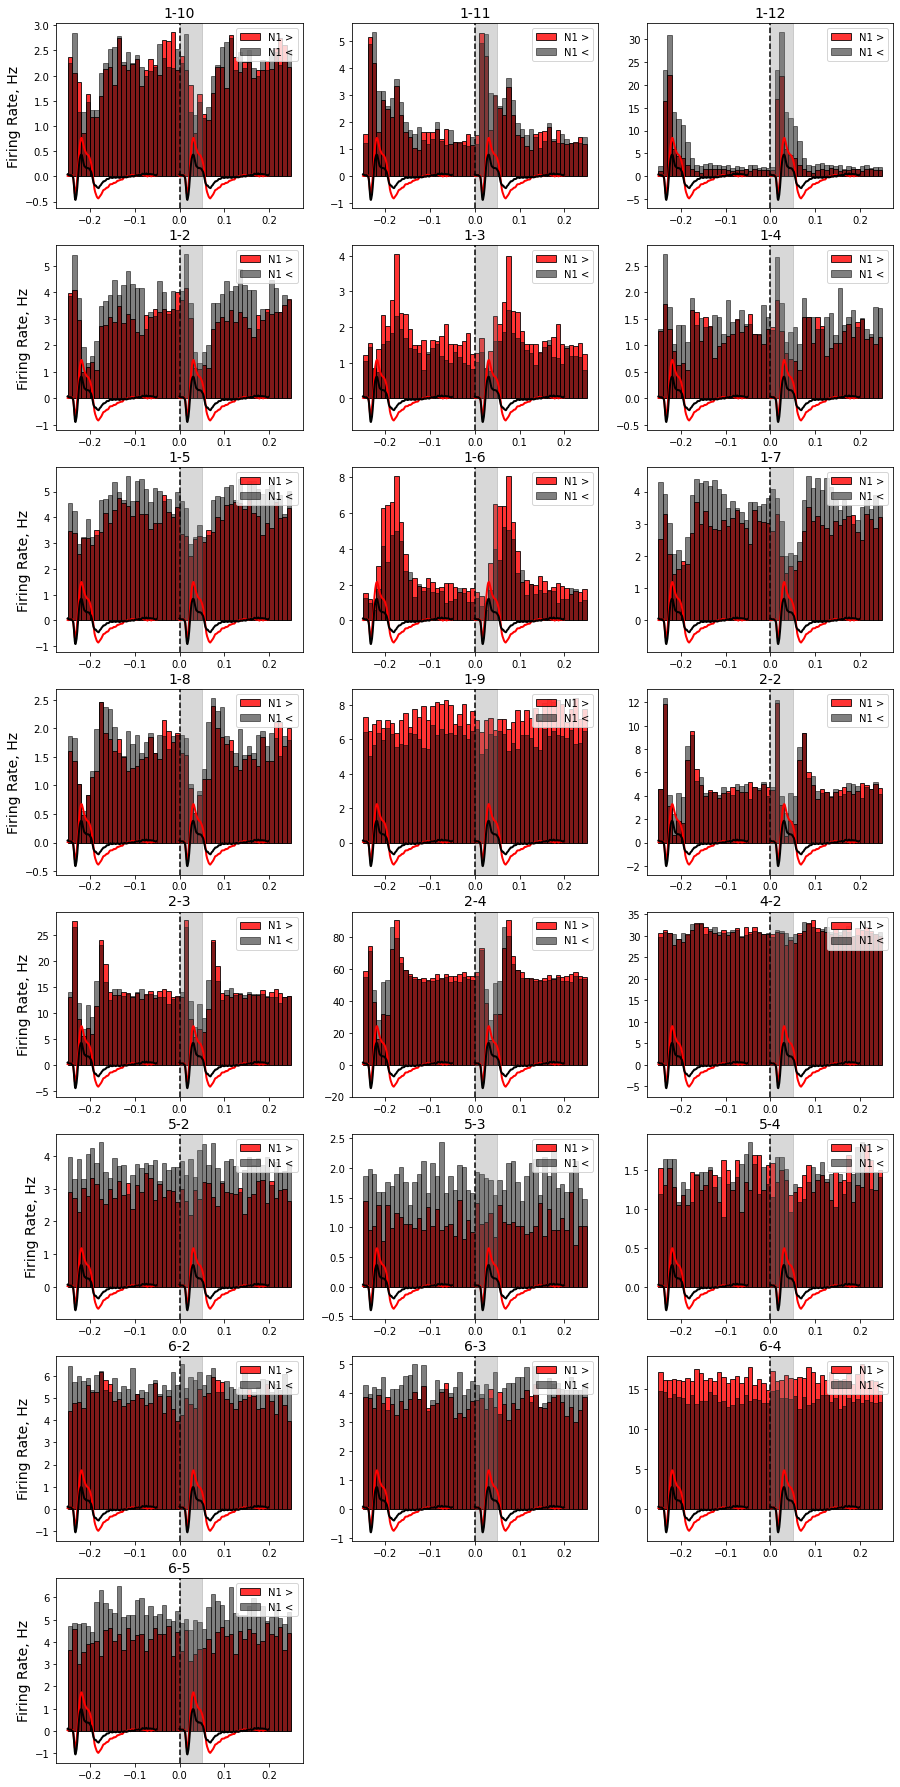

In [32]:
to_plot = dict(list(single_units.items()))

rows = int(np.ceil(len(to_plot)/3))
fig = plt.figure(figsize=(15, rows*4))
m_name = 'N1'
predictor = AEP_metrics_norm[m_name]
low_state_idxs  = np.where(predictor < predictor.mean())[0]
high_state_idxs = np.where(predictor > predictor.mean())[0]
aeps_low_mean  = aeps[area][low_state_idxs].mean(axis=0)
aeps_high_mean = aeps[area][high_state_idxs].mean(axis=0)

for i, unit_name in enumerate(to_plot.keys()):
    bins, counts_low  = get_spike_counts(spike_times[unit_name], aeps_events[low_state_idxs][:, 0])
    bins, counts_high = get_spike_counts(spike_times[unit_name], aeps_events[high_state_idxs][:, 0])
    
    vals_max = np.array([counts_high.max(), counts_low.max()]).max()
    aep_low_profile  = (1/4) * vals_max * (aeps_low_mean/1000)
    aep_high_profile = (1/4) * vals_max * (aeps_high_mean/1000)
    
    ax = fig.add_subplot(rows, 3, i+1)
    ax.hist(bins[:-1], bins=bins, weights=counts_high, edgecolor='black', color='red', alpha=0.8, label='%s >' % m_name)
    ax.hist(bins[:-1], bins=bins, weights=counts_low, edgecolor='black', color='black', alpha=0.5, label='%s <' % m_name)
    for x_l, x_r in [(-0.25, -0.051), (0.0, 0.199)]:
        ax.plot(np.linspace(x_l, x_r, len(aeps_low_mean)),  aep_high_profile, color='red', lw=2)
        ax.plot(np.linspace(x_l, x_r, len(aeps_high_mean)), aep_low_profile, color='black', lw=2)
    
    ax.axvline(0, color='black', ls='--')
    #ax.set_xlabel('Pulse onset, s', fontsize=14)
    ax.axvspan(0, 0.05, alpha=0.3, color='gray')
    ax.set_title(unit_name, fontsize=14)
    ax.legend(loc='upper right', prop={'size': 10})
    if i % 3 == 0:
        ax.set_ylabel("Firing Rate, Hz", fontsize=14)
        
fig.savefig(os.path.join(report_path, 'PSTH_%s_high_low.pdf' %  m_name))

### AEP metric high / low

(0.0, 3.0)

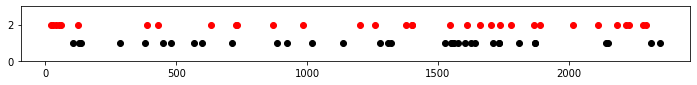

In [37]:
# low / high state of a metric in time
m_name = 'P3'
predictor = AEP_metrics_norm[m_name]
pre_tgt_metrics = np.array([predictor[idx - 8:idx - 1].mean() for idx in tgt_matrix[:, 2]])
low_state  = np.where(pre_tgt_metrics < pre_tgt_metrics.mean())[0]
high_state = np.where(pre_tgt_metrics > pre_tgt_metrics.mean())[0]

fig, ax = plt.subplots(1, 1, figsize=(12, 1))
ax.scatter(aeps_events[tgt_matrix[:, 2]][low_state][:, 0], np.ones(len(low_state)), color='black')
ax.scatter(aeps_events[tgt_matrix[:, 2]][high_state][:, 0], np.ones(len(high_state)) + 1, color='red')
ax.set_ylim(0, 3)

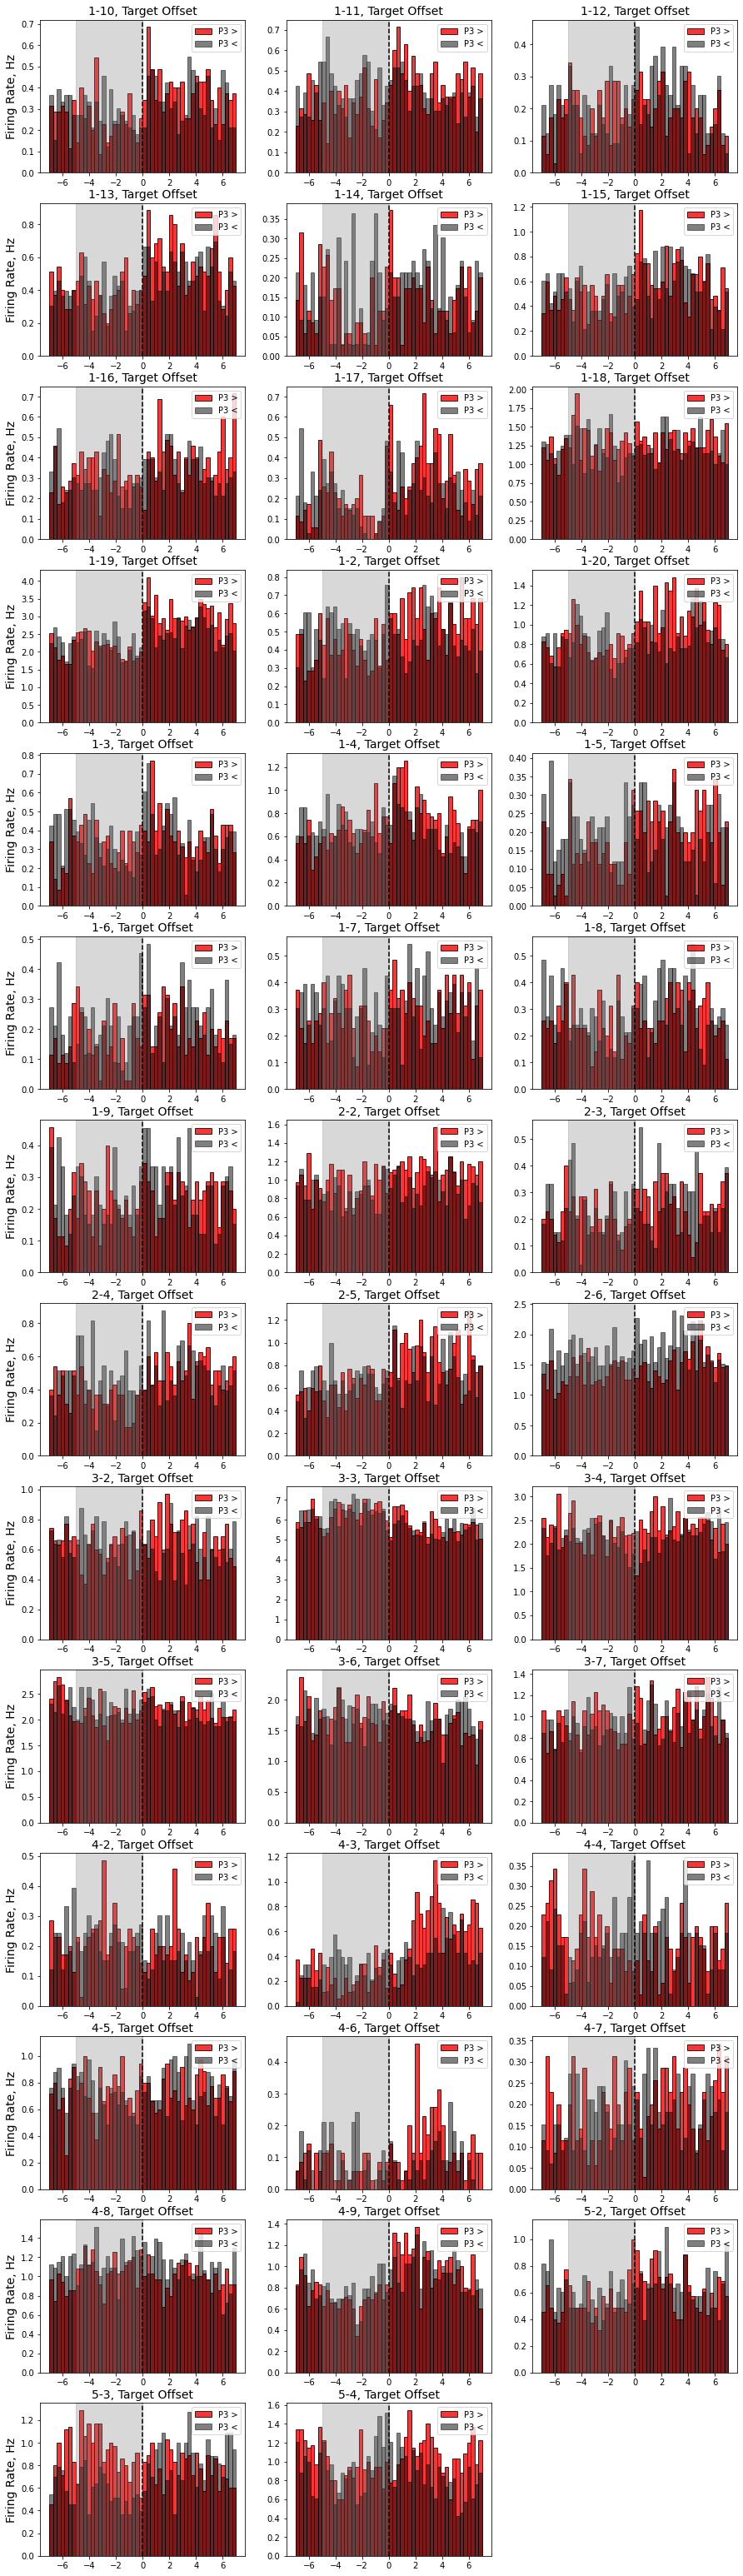

In [38]:
to_plot = dict(list(single_units.items())[:100])
entrances = tl[tgt_matrix[:, 0]][:, 0]
exits     = tl[tgt_matrix[:, 1]][:, 0]

rows = int(np.ceil(len(to_plot)/3))
fig = plt.figure(figsize=(15, rows*4))
for i, unit_name in enumerate(to_plot.keys()):
    bins, counts_tgt_success = get_spike_counts(spike_times[unit_name], exits[low_state], hw=7, bin_count=51)
    bins, counts_tgt_fail    = get_spike_counts(spike_times[unit_name], exits[high_state], hw=7, bin_count=51)
    
    ax = fig.add_subplot(rows, 3, i+1)
    ax.hist(bins[:-1], bins=bins, weights=counts_tgt_success, edgecolor='black', color='red', alpha=0.8, label='%s >' % m_name)
    ax.hist(bins[:-1], bins=bins, weights=counts_tgt_fail, edgecolor='black', color='black', alpha=0.5, label='%s <' % m_name)
    ax.axvline(0, color='black', ls='--')
    ax.set_title("%s, Target Offset" % unit_name, fontsize=14)
    ax.axvspan(-tgt_dur, 0, alpha=0.3, color='gray')
    ax.legend(loc='upper right', prop={'size': 10})
    if i % 3 == 0:
        ax.set_ylabel("Firing Rate, Hz", fontsize=14)

fig.savefig(os.path.join(report_path, 'PSTH_%s_high_low_tgt_offset.pdf' % m_name))

## Unit-induced modulation?

In [66]:
aeps_tl_idxs = []  # idxs to timeline for AEP events
for event_t in aeps_events[:, 0]:  # AEP event times
    event_idx = (np.abs(tl[:, 0] - event_t)).argmin()
    aeps_tl_idxs.append(event_idx)
aeps_tl_idxs = np.array(aeps_tl_idxs)

Text(0.5, 1.0, '8-8')

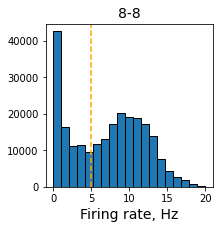

In [68]:
unit = '8-8'
i_rate = single_units[unit]
thresh = i_rate.mean()
thresh = 5

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.hist(i_rate, bins=np.linspace(0, 20, 20), edgecolor='black')
ax.axvline(thresh, color='orange', ls='--')
ax.set_xlabel('Firing rate, Hz', fontsize=14)
ax.set_title(unit, fontsize=14)

In [74]:
high_rate_idxs = np.where(i_rate[aeps_tl_idxs] > thresh + i_rate.std())[0]  # indices of AEPs where neuron fired high
high_rate_idxs.shape

(2567,)

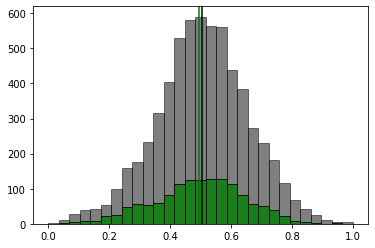

In [73]:
metric = 'P3'
plt.hist(AEP_metrics_norm[metric], bins=np.linspace(0, 1, 30), edgecolor='black', color='black', alpha=0.5)
plt.hist(AEP_metrics_norm[metric][high_rate_idxs], bins=np.linspace(0, 1, 30), edgecolor='black', color='green', alpha=0.8)
plt.axvline(AEP_metrics_norm[metric].mean(), color='black')
plt.axvline(AEP_metrics_norm[metric][high_rate_idxs].mean(), color='green')

## Event-evoked modulation

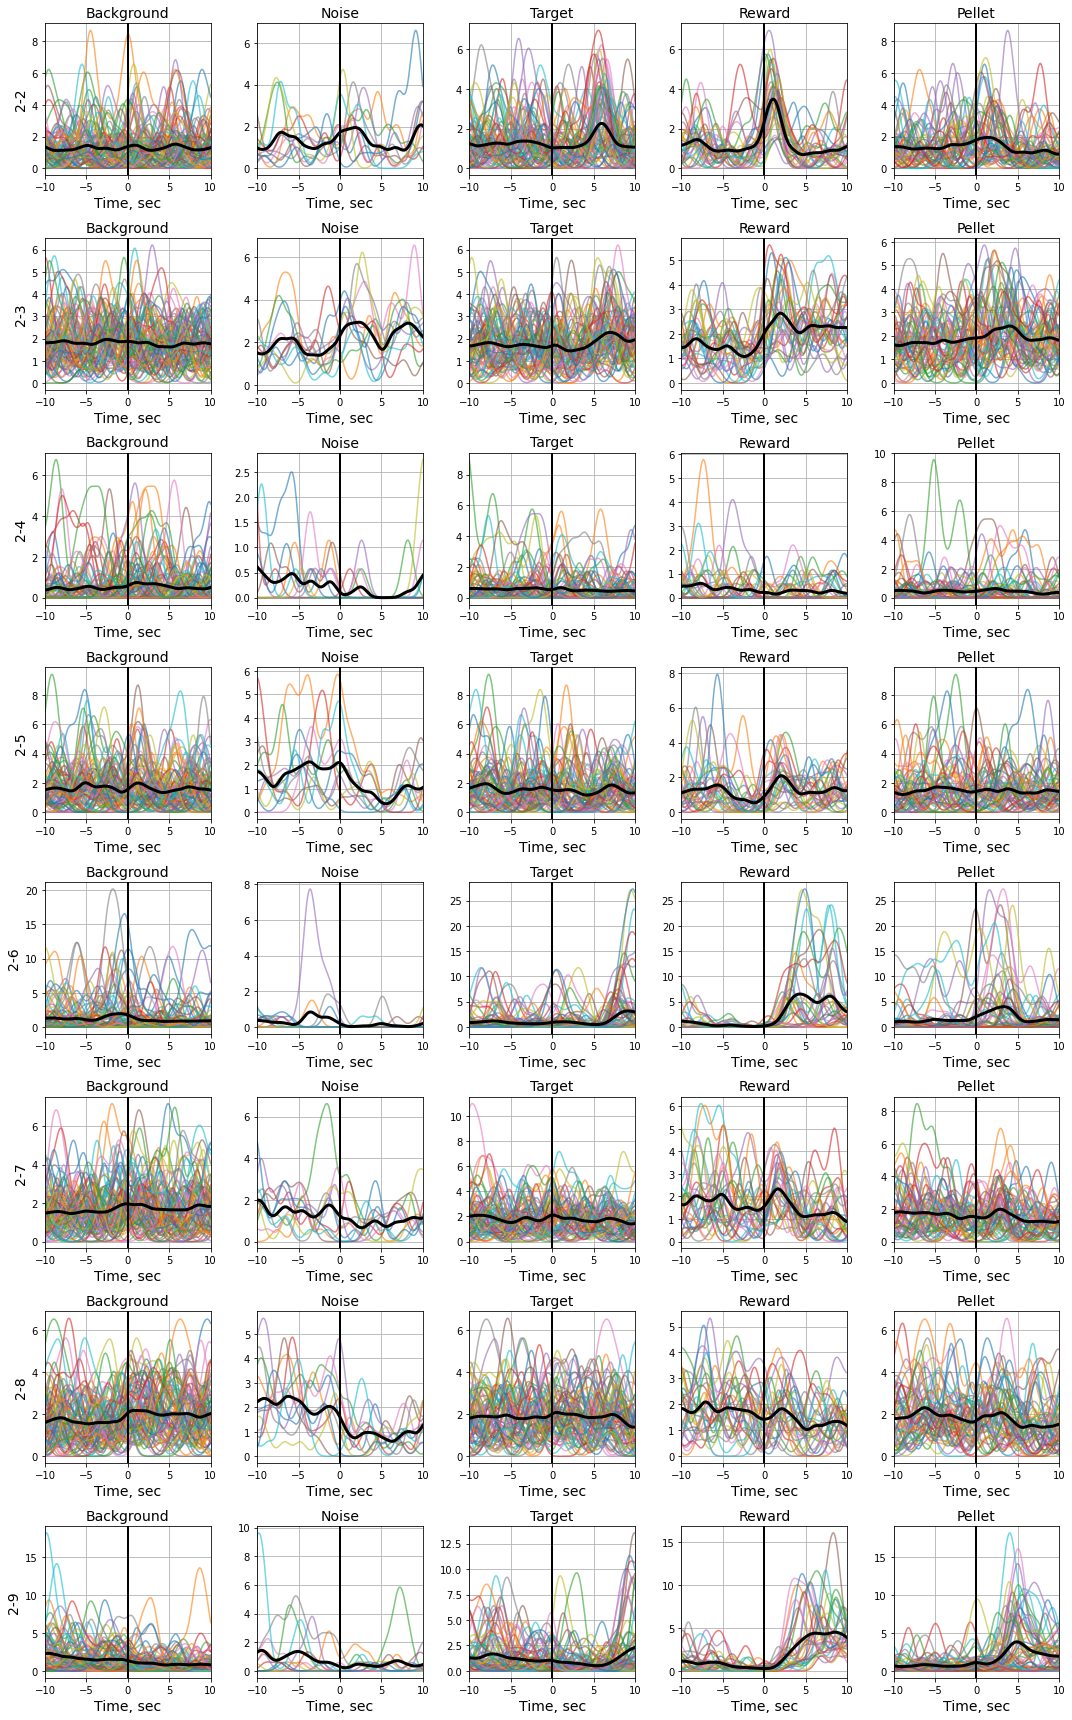

In [183]:
fig = plt.figure(figsize=(15, 3*len(to_plot)))

offset = 100 * 10  # 5 seconds
x_vals = np.linspace(-offset/s_rate, offset/s_rate, 2*offset)
axes = []
j = 0

for ass_id, i_rate in to_plot.items():
    for i, var_idxs in enumerate([idxs_bgr_start, idxs_nos_start, idxs_tgt_start, idxs_reward, idxs_pel_start]):
       
        ax = fig.add_subplot(len(to_plot), 5, i+1 + 5*j)

        # TODO add averages /stds
        x_coll, y_coll = [], []
        for idx in var_idxs:
            idx_x_l =  0 if idx - offset > 0 else offset - idx
            idx_x_r = len(x_vals) if idx + offset < len(i_rate) else offset + len(i_rate) - idx - 1
            idx_y_l =  0 if idx - offset < 0 else idx - offset
            idx_y_r = -1 if idx + offset > len(i_rate) else idx + offset
            ax.plot(x_vals[idx_x_l:idx_x_r], i_rate[idx_y_l:idx_y_r], alpha=0.6)
            x_coll.append(x_vals[idx_x_l:idx_x_r])
            y_coll.append(i_rate[idx_y_l:idx_y_r])

        # cheating - just don't consider boudaries
        y_coll_filt = [a for a in y_coll if a.shape[0] == 2*offset]
        ax.plot(x_vals, np.array(y_coll_filt).mean(axis=0), lw=3, color='black')
        ax.set_xlim(-offset/s_rate, offset/s_rate)
        ax.axvline(0, linewidth=2, color='black')
        ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel('Time, sec', fontsize=14)
        if i == 0:
            ax.set_ylabel('Firing rate, Hz', fontsize=14)
        ax.grid()
        axes.append(ax)
        
        if i == 0:
            ax.set_ylabel(ass_id, fontsize=14)
    j += 1
    
fig.tight_layout()

## Cross-assembly

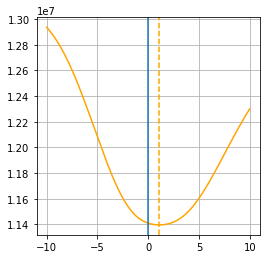

In [282]:
a1, a2 = assembly_activity[12], assembly_activity[6]
t_lag = 10
s_rate = 100

corr = signal.correlate(a1, a2)
lags = signal.correlation_lags(len(a2), len(a1))

idx_l, idx_r = int(len(lags)/2) - t_lag*s_rate, int(len(lags)/2) + t_lag*s_rate
y_min = 0.8*corr[idx_l:idx_r].min()
y_max = 1.2*corr[idx_l:idx_r].max()

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(lags[idx_l:idx_r]/s_rate, corr[idx_l:idx_r], color='orange')
ax.axvline(0)
ax.axvline((lags[idx_l:idx_r]/s_rate)[corr[idx_l:idx_r].argmin()], ls='--', color='orange')
ax.grid()

In [245]:
(lags[idx_l:idx_r]/s_rate)[1025]

0.25

## Cross-unit

In [211]:
def autocorr(spike_times, t_max=0.05):
    ISIs = np.diff(spike_times)
    ISIs = ISIs[ISIs < t_max]
    return np.concatenate([ISIs, -1*ISIs])

def crosscorr(s1, s2, t_max=0.05):
    j = 0
    ISIs = []
    for i, s_time in enumerate(s1):
        if j >= len(s2):
            continue

        while s2[j] < s_time:
            j += 1
            if j >= len(s2):
                break

        for k in range(100):  # positive
            if j + k >= len(s2):
                break
            isi = s2[j + k] - s_time
            if isi > t_max:
                break        
            ISIs.append(isi)

        for k in range(100):  # negative
            if j - k - 1 < 0:
                break
            isi = s2[j - k - 1] - s_time
            if isi < -t_max:
                break        
            ISIs.append(isi)
            
    return ISIs

In [222]:
assembly_weights

{1: {'3-12': 0.425, '6-19': 0.247, '6-4': 0.253, '8-10': 0.25, '8-16': 0.287},
 10: {'1-4': 0.259, '6-19': 0.347, '7-17': 0.432},
 11: {'5-14': 0.344, '5-15': 0.295, '6-5': 0.306},
 2: {'3-12': 0.278, '7-2': 0.288, '8-12': 0.33},
 3: {'3-3': 0.306, '5-29': 0.342, '6-20': 0.358},
 4: {'4-16': 0.265, '5-7': 0.252, '6-18': 0.303},
 5: {'1-8': 0.263, '7-5': 0.392, '8-15': 0.361},
 6: {'1-26': 0.28, '7-14': 0.276, '8-8': 0.336},
 7: {'5-20': 0.241, '6-21': 0.25, '7-8': 0.357, '8-11': 0.453, '8-3': 0.344},
 8: {'5-31': 0.432, '7-19': 0.455},
 9: {'7-12': 0.404, '8-4': 0.44}}

In [232]:
units = ['5-14', '5-15', '6-5', '1-26', '8-8']

spiketrains = {}
with h5py.File(h5name, 'r') as f:
    tl = np.array(f['processed']['timeline'])  # time, X, Y, speed, etc.
    trials = np.array(f['processed']['trial_idxs'])  # t_start_idx, t_end_idx, x_tgt, y_tgt, r_tgt, result
    
    for unit_name in units:
        spiketrains[unit_name] = np.array(f['units'][unit_name][H5NAMES.spike_times['name']])

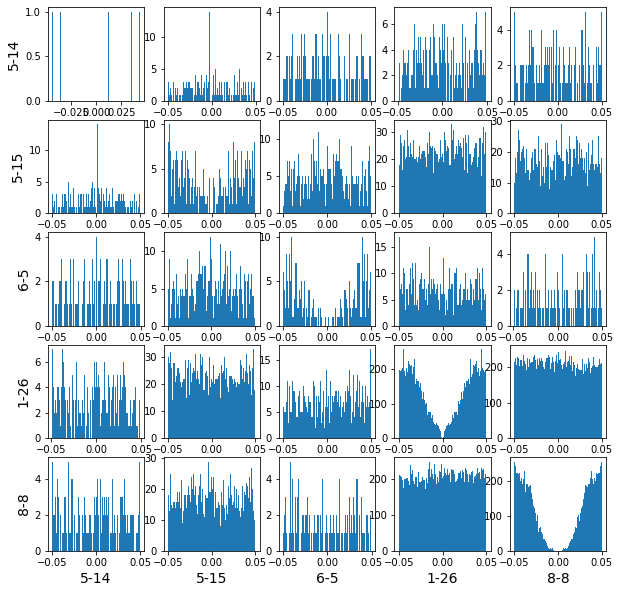

In [233]:
dim = len(spiketrains)
fig, axes = plt.subplots(dim, dim, figsize=(2*dim, 2*dim))

for i, (s1_name, s1_times) in enumerate(spiketrains.items()):
    for j, (s2_name, s2_times) in enumerate(spiketrains.items()):
        if s1_name == s2_name:
            ISIs = autocorr(s1_times)
        else:
            ISIs = crosscorr(s1_times, s2_times)
        
        axes[i][j].hist(ISIs, bins=101)
        if j == 0:
            axes[i][j].set_ylabel(s1_name, fontsize=14)
        if i == len(spiketrains) - 1:
            axes[i][j].set_xlabel(s2_name, fontsize=14)            